# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

#  1. Load Dataset

In [2]:
df = pd.read_csv('Cars.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# 2. EDA

## 2.1 Data Cleaning

In [3]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1353,Maruti Alto LXi BSIII,2009,130000,80000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
3812,Hyundai Grand i10 Sportz,2015,400000,128000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
1347,Mahindra Ingenio CRDe,2017,600000,60000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7251,Maruti Wagon R AMT VXI Option,2018,472000,30000,Petrol,Individual,Automatic,First Owner,20.51 kmpl,998 CC,67 bhp,90Nm@ 3500rpm,5.0
3880,Maruti Zen Estilo LXI BS IV,2013,235000,43000,Petrol,Individual,Manual,Second Owner,19.0 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


In [4]:
owner_map = dict()
for i, owner in enumerate(df.owner.unique()):
    owner_map[owner] = i+1
    
owner_map

{'First Owner': 1,
 'Second Owner': 2,
 'Third Owner': 3,
 'Fourth & Above Owner': 4,
 'Test Drive Car': 5}

In [5]:
df.owner = df.owner.map(owner_map)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [7]:
df = df[~df.fuel.str.contains("CNG|LPG")]
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

In [8]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '24.52 kmpl',
       '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl',
       '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl', '18.2 kmpl',
       '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl', '23.95 kmpl',
       '17.0 kmpl', '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl',
       '18.5 kmpl', '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl',
       '26.0 kmpl', '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '16.47 kmpl', '15.04 kmpl',
      

In [9]:
df.mileage.isnull().sum()

214

In [10]:
def get_value(x):
    if type(x) is str:
        return float(x.split()[0])
    else:
        return x

In [11]:
df.mileage =  df.mileage.apply(lambda x: get_value(x))
df.mileage.unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 23.59, 20.  , 19.01,
       17.3 , 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21, 15.37,
       11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 , 14.53,
       21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01, 22.37,
       19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96, 18.  ,
       12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56, 22.69,
       19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44, 13.  ,
       21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 17.6 , 28.4 ,
       14.1 , 25.17,

In [12]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1061 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [13]:
df.engine =  df.engine.apply(lambda x: get_value(x))
df.engine.unique()

array([1248., 1498., 1497., 1396., 1298., 1197.,  796., 1364., 1399.,
       1461.,  993.,   nan, 1061., 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [14]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp',
       '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp', '168.5 bhp',
       '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp', '103.25 bhp',
       '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp', '170 bhp',
       '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp', '108.62 bhp',
       '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp', '67.04 bhp',
       '68.05 bhp', '82.85 bhp', '81.80 bhp', '73 bhp', '120 bhp',
       '94.68 bhp', '160 bhp', '65 bhp', '155 bhp', '69.01 bhp',
       '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp', '98.96 bhp',
       '62.1 bhp', '86.7 bhp', '18

In [15]:
df.max_power =  df.max_power.apply(lambda x: get_value(x))
df.max_power.unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
       121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,  67.05 ,
       168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  ,
       100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  ,
       108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,
        68.05 ,  82.85 ,  81.8  ,  73.   , 120.   ,  94.68 , 160.   ,
        65.   , 155.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,
        98.96 ,  62.1  ,  86.7  , 188.   , 214.56 , 177.   , 280.   ,
       148.31 , 254.79 , 190.   , 177.46 , 204.   , 141.   , 117.6  ,
       241.4  , 282.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   ,
       181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,  75.   ,
        85.8  ,  87.

In [16]:
len(df.name.unique())

2018

In [17]:
df["name"] = df.name.apply(lambda x: x.split()[0])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [18]:
df.rename(columns={'name': 'brand'}, inplace=True)

In [19]:
len(df.brand.unique())

32

In [20]:
df.drop(columns=["torque"], axis=1, inplace=True)
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [21]:
df = df[df.owner != 5]
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


## 2.2 Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

fuel_encoder = LabelEncoder()
seller_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()

In [23]:
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])
df["seller_type"] = seller_encoder.fit_transform(df["seller_type"])
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])

In [24]:
print(fuel_encoder.classes_)
print(seller_encoder.classes_)
print(transmission_encoder.classes_)

['Diesel' 'Petrol']
['Dealer' 'Individual' 'Trustmark Dealer']
['Automatic' 'Manual']


In [25]:
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["transmission"].unique())

[0 1]
[1 0 2]
[1 0]


## 2.3 Univariate analyis

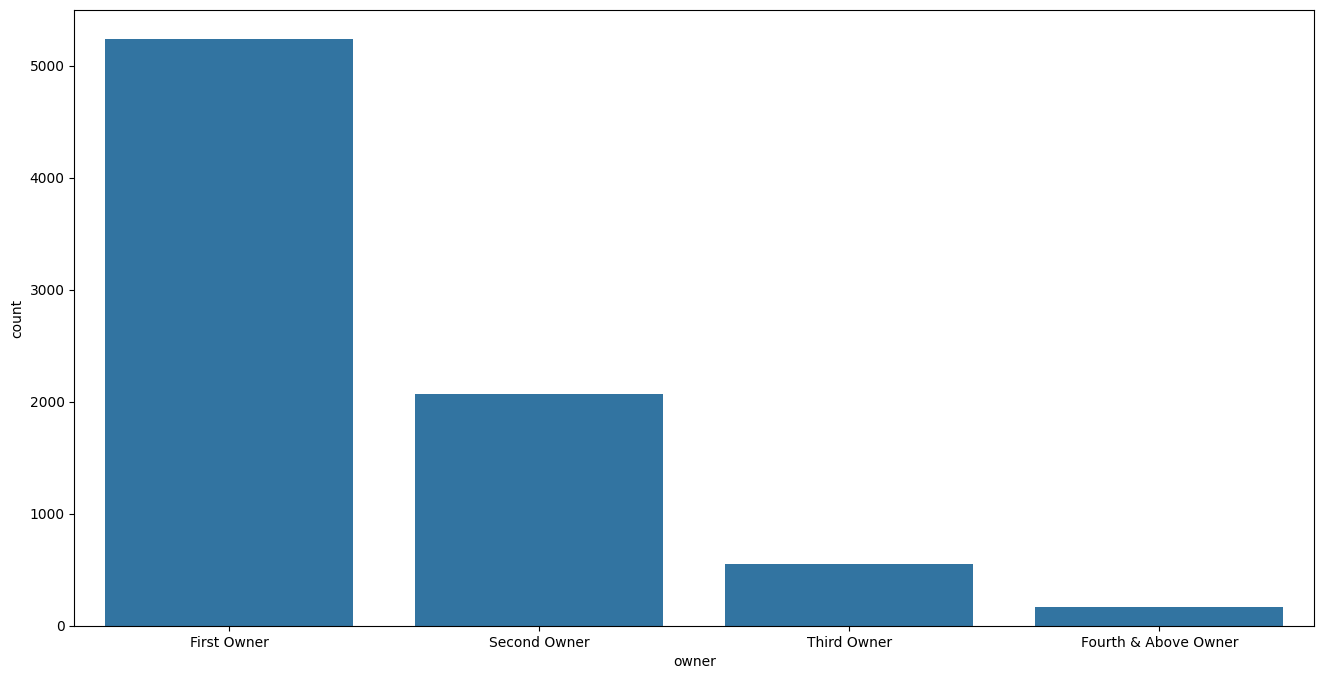

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'owner')
plt.xticks(ticks=[0, 1, 2, 3], labels=["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"])
plt.show()

count    7814.000000
mean     1462.914640
std       504.759742
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

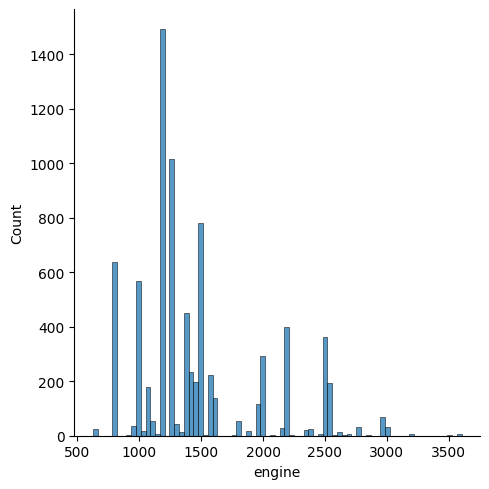

In [30]:
sns.displot(data = df, x = 'engine')
df["engine"].describe()

count    7820.000000
mean       91.819726
std        35.804513
min         0.000000
25%        68.850000
50%        82.400000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

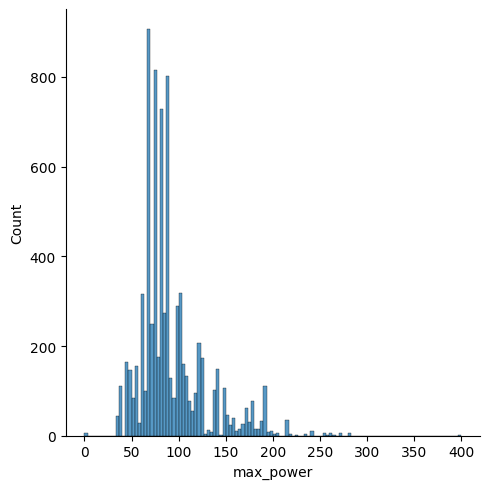

In [31]:
sns.displot(data = df, x = 'max_power')
df["max_power"].describe()

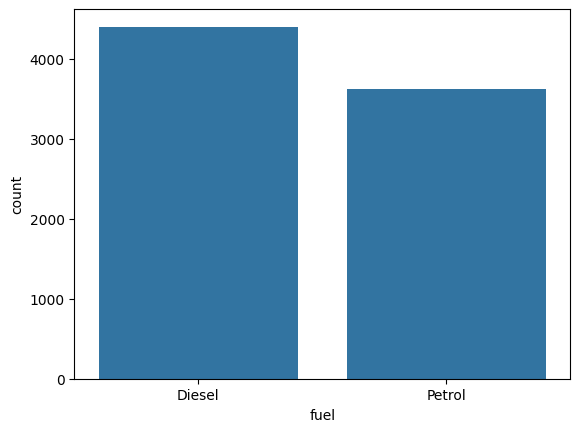

In [27]:
sns.countplot(data = df, x = "fuel")
plt.xticks(ticks=[0, 1], labels=['Diesel', 'Petrol'])
plt.show()

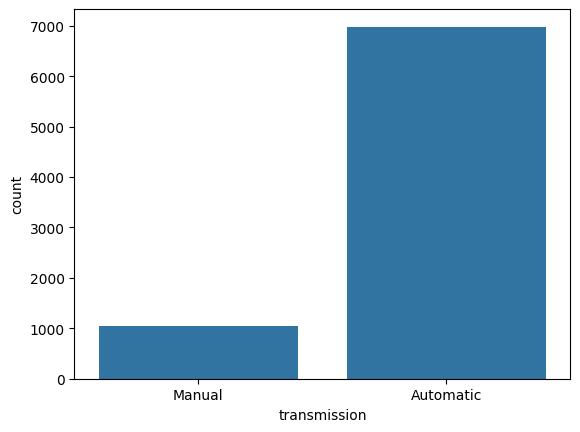

In [28]:
sns.countplot(data = df, x = "transmission")
plt.xticks(ticks=[0, 1], labels=['Manual', 'Automatic'])
plt.show()

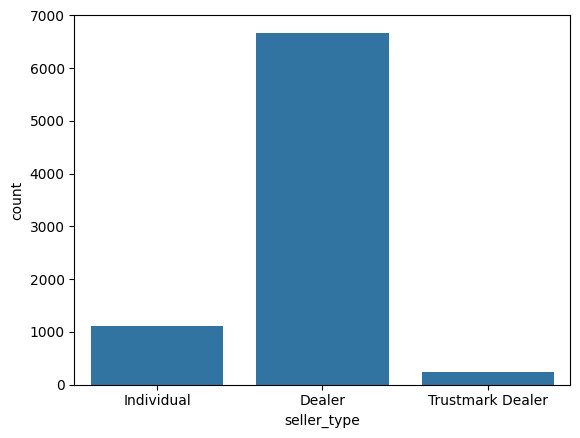

In [29]:
sns.countplot(data = df, x = "seller_type")
plt.xticks(ticks=[0, 1, 2], labels=['Individual', 'Dealer', 'Trustmark Dealer'])
plt.show()

## 2.4 Multivariate analysis

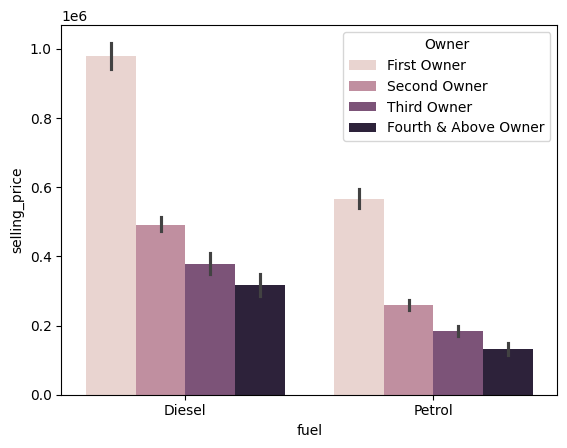

In [30]:
sns.barplot(data=df, x='fuel', y='selling_price', hue="owner")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"] , title="Owner")
plt.xticks(ticks=[0, 1], labels=['Diesel', 'Petrol'])
plt.show()

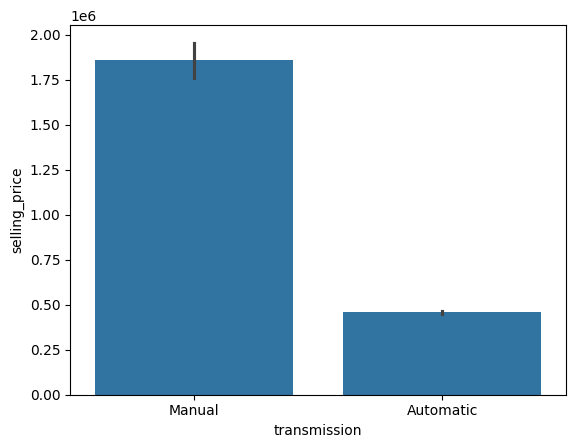

In [31]:
sns.barplot(data=df, x='transmission', y='selling_price')
plt.xticks(ticks=[0, 1], labels=['Manual', 'Automatic'])
plt.show()

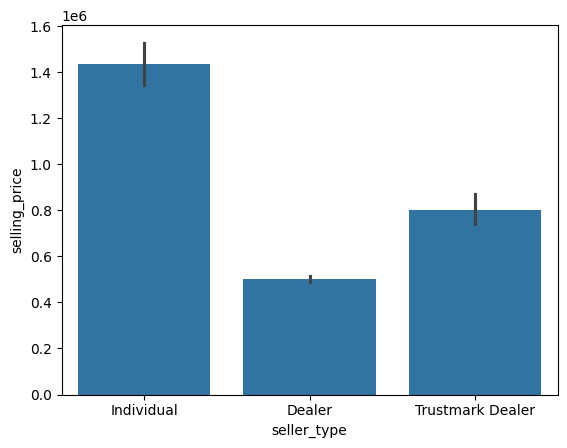

In [32]:
sns.barplot(data=df, x='seller_type', y='selling_price')
plt.xticks(ticks=[0, 1, 2], labels=['Individual', 'Dealer', 'Trustmark Dealer'])
plt.show()

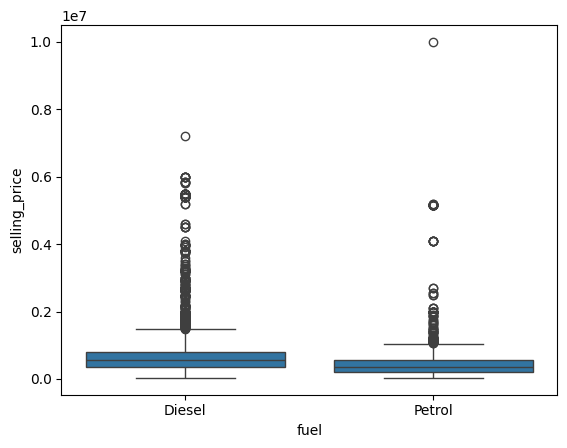

In [33]:
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.xticks(ticks=[0, 1], labels=['Diesel', 'Petrol'])
plt.show()

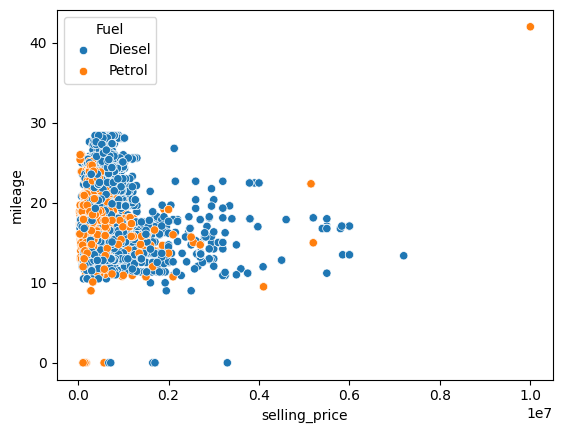

In [34]:
sns.scatterplot(data=df, x="selling_price", y="mileage", hue="fuel")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Diesel', 'Petrol'] , title="Fuel")

<Axes: >

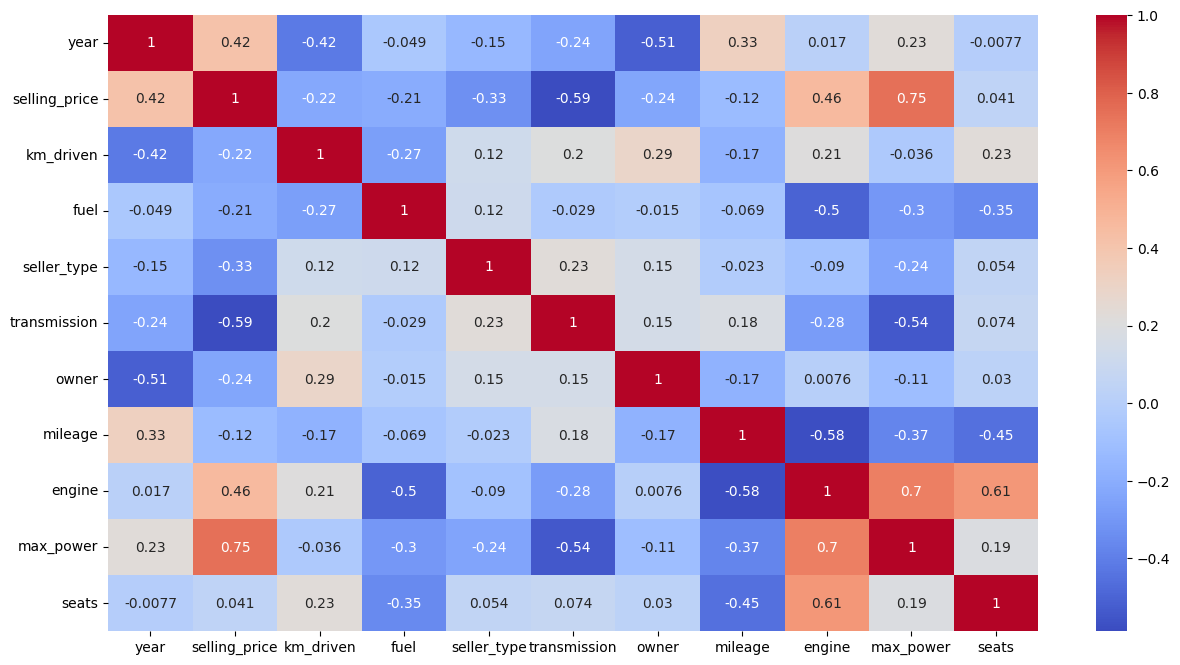

In [35]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# 3. Feature Selection

In [36]:
X = df[['year', "transmission", "engine", "max_power"]]
y = df["selling_price"]

In [37]:
y = np.log(y)
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

## 3.1 Train and Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 4. Preprocessing

In [39]:
X_train.shape

(6422, 4)

In [40]:
X_train.isnull().any()

year            False
transmission    False
engine           True
max_power        True
dtype: bool

In [41]:
X_train.engine.isnull().sum()

171

In [42]:
X_train.max_power.isnull().sum()

165

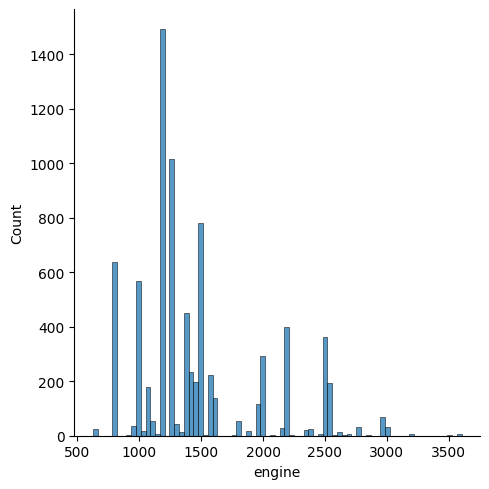

In [43]:
sns.displot(data=df, x="engine")

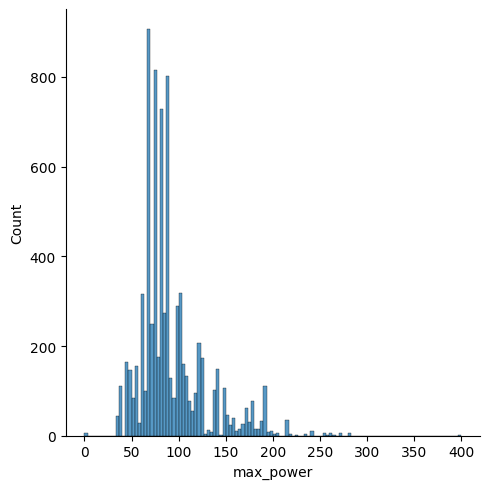

In [44]:
sns.displot(data=df, x="max_power")

In [45]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [46]:
y_train.isnull().sum()

0

In [47]:
X_test.isnull().any()

year            False
transmission    False
engine           True
max_power        True
dtype: bool

In [48]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)

In [49]:
y_test.isnull().sum()

0

In [50]:
X_train

,year,transmission,engine,max_power
2982,2016,1,799.0,53.300000
2430,2013,1,796.0,47.300000
6294,2009,1,1248.0,91.787639
6255,2018,1,2179.0,153.860000
4253,1999,1,1998.0,68.000000
...,...,...,...,...
5293,2013,1,1197.0,78.900000
5461,2016,1,998.0,67.040000
865,2015,1,1248.0,88.760000
7701,2019,0,2487.0,214.560000


# 5 Model Selection

In [51]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_predict))
print("r2: ", r2_score(y_test, y_predict))

MSE:  0.09754643048671793
r2:  0.8630237869415395


## 5.1 Cross validation + Grid search

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [53]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.10676698 -0.09387758 -0.11819005 -0.0989293  -0.11386421]; Mean: -0.10632562302293105
SVR - Score: [-0.33497067 -0.32766495 -0.35584162 -0.35899376 -0.34808499]; Mean: -0.3451111987963375
KNeighbors Regressor - Score: [-0.06925901 -0.05926773 -0.06962781 -0.07154607 -0.06669413]; Mean: -0.06727894963256793
Decision-Tree Regressor - Score: [-0.06771332 -0.05875535 -0.0697988  -0.06207292 -0.06197035]; Mean: -0.06406214951373065
Random-Forest Regressor - Score: [-0.05899341 -0.0530683  -0.05147256 -0.05663763 -0.05850077]; Mean: -0.055734534542239464


## 5.2 Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train);

In [55]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [56]:
best_mse = grid.best_score_

In [57]:
best_mse

-0.059379783240784946

# 6. Testing

In [58]:
y_predict = grid.predict(X_test)
mean_squared_error(y_test, y_predict)

0.04964947868858596

# 7. Inference

In [59]:
import pickle


filename = 'car_price_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [60]:
loaded_model = pickle.load(open(filename, 'rb'))

In [61]:
sample = df.sample()[['year', "transmission", "engine", "max_power"]]
sample

,year,transmission,engine,max_power
6422,2018,1,1199.0,84.0


In [62]:
result = df.loc[6422]["selling_price"]
result

459999

In [63]:
predicted_car_price = loaded_model.predict(sample)
np.exp(predicted_car_price)

array([452039.78158729])

# 8. Analysis: Feature Importance

In [64]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.48897855, 0.0036402 , 0.07962547, 0.42775578])

<BarContainer object of 4 artists>

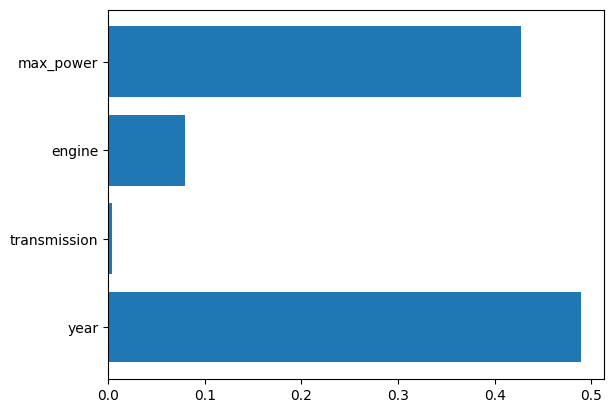

In [65]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

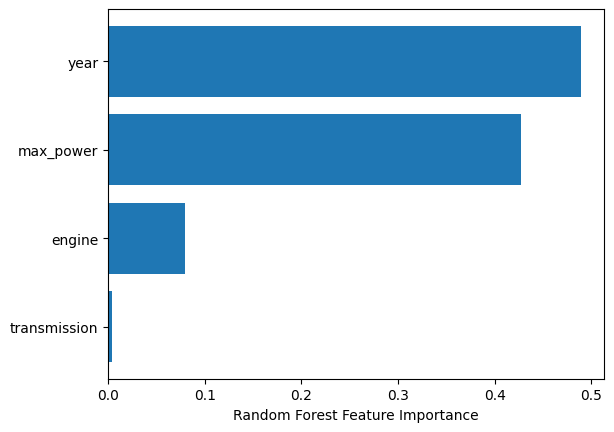

In [66]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Conclusion: Year and Max Power features play as the important roles in prediction of selling price becasue in real world, people always find the latest model which has maximum engine power. On the other hand, engine and transmission types slightly influence the selling price is reasonable.

### According to Grid Search, Random Forest Regressor is the best for our case because of the following advantages:

- Reduction of Overfitting
- Handling Non-linear Data
- Understanding Data
- Robust to Outliers and Noise


### Support Vector Regressor made the worst predictions and had a big number of Mean Square Error. It may be becasue it is

- Fails with Non-linear Relationships
- Overfitting with Noisy Data
- Inability to Capture Complex Patterns